In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [4]:
fd1 = pd.read_csv("UpdatedResumeDataSet.csv")

In [5]:
fd1

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [6]:
fd2 = pd.read_csv("Resume_dataset.csv")

In [7]:
fd2

,Category,Resume
0,Frontend Developer,"As a seasoned Frontend Developer, I have a pro..."
1,Backend Developer,With a solid background in Backend Development...
2,Python Developer,"As a Python Developer, I leverage my expertise..."
3,Data Scientist,"With a background in Data Science, I possess a..."
4,Frontend Developer,Experienced Frontend Developer with a passion ...
...,...,...
395,Cloud Engineer,Dynamic Cloud Engineer specializing in archite...
396,Cloud Engineer,Skilled Cloud Engineer with a focus on buildin...
397,Full Stack Developer,Experienced Full Stack Developer with expertis...
398,Full Stack Developer,Innovative Full Stack Developer with a passion...


In [8]:
df = pd.concat([fd1, fd2], ignore_index=True)

In [9]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
1357,Cloud Engineer,Dynamic Cloud Engineer specializing in archite...
1358,Cloud Engineer,Skilled Cloud Engineer with a focus on buildin...
1359,Full Stack Developer,Experienced Full Stack Developer with expertis...
1360,Full Stack Developer,Innovative Full Stack Developer with a passion...


In [10]:
df.shape

(1362, 2)

In [11]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing',
       'Frontend Developer', 'Backend Developer', 'Data Scientist',
       'Full Stack Developer', 'Mobile App Developer (iOS/Android)',
       'Machine Learning Engineer', 'Cloud Engineer'], dtype=object)

In [12]:
df['Category'].value_counts()

Category
Python Developer                      93
Java Developer                        84
Testing                               70
Backend Developer                     57
Cloud Engineer                        56
DevOps Engineer                       55
Frontend Developer                    54
Data Scientist                        53
Full Stack Developer                  47
Mobile App Developer (iOS/Android)    45
Web Designing                         45
HR                                    44
Machine Learning Engineer             43
Hadoop                                42
Sales                                 40
Operations Manager                    40
Data Science                          40
Mechanical Engineer                   40
Blockchain                            40
ETL Developer                         40
Arts                                  36
Database                              33
Health and fitness                    30
Electrical Engineering                30
PMO    

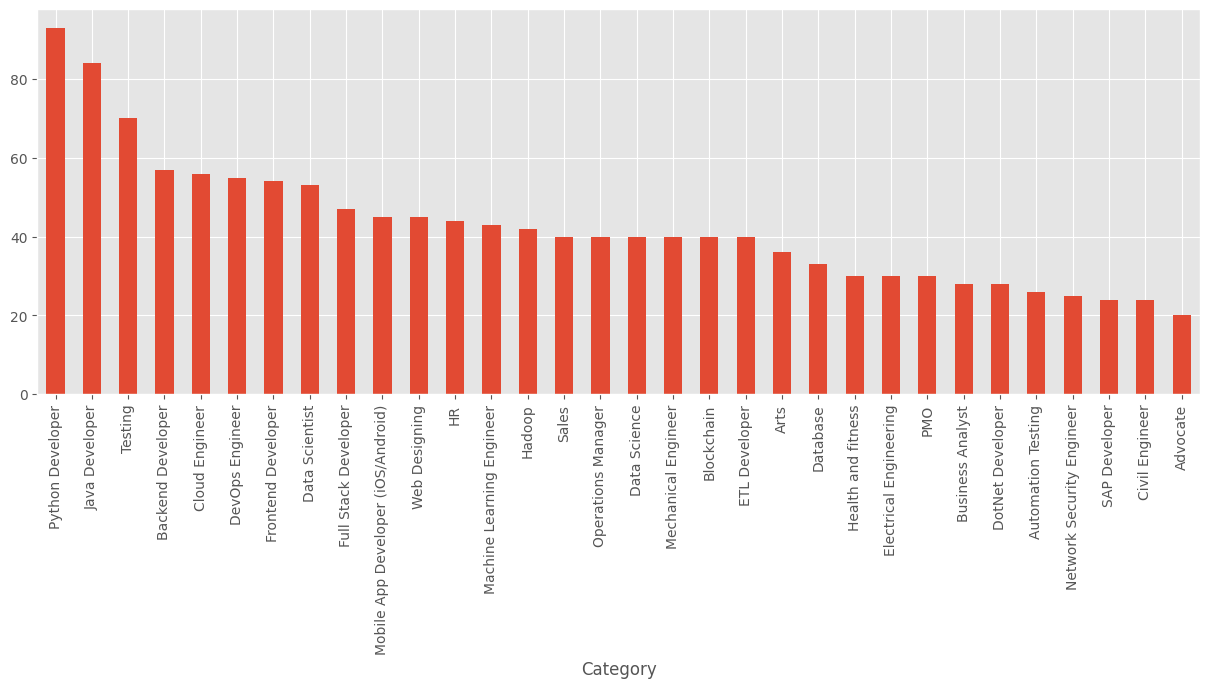

In [13]:
# Data Visualization
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind="bar")
plt.show()

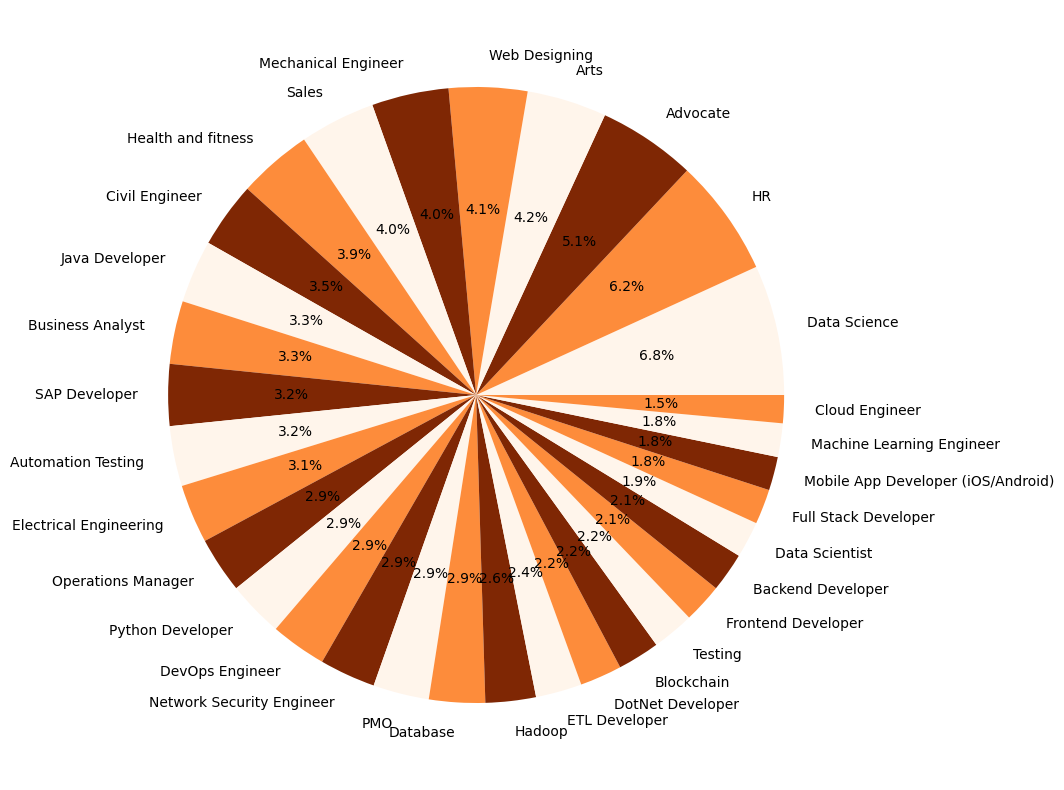

In [14]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

In [15]:
# Text cleaning using NLP
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [16]:
# Remove URL
# Remove Emails
# Remove Special Character
# Remove stop words
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text  = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text
    

In [17]:
s = 'Hello, $%& I found this # article at https://www.chando.com ! You can contact me at chando@example.com'

In [18]:
clean(s)

'Hello found article contact'

In [19]:
df['Resume'] = df['Resume'].apply(lambda x:clean(x))

In [20]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [21]:
#Encoding
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category']) 

C:\Users\vicky\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df['Category'].unique()

array([ 8, 17,  0,  1, 31, 22, 29, 19,  6, 20,  5, 28,  2, 14, 25, 27, 11,
       24, 26, 10, 18, 13, 12,  4, 30, 15,  3,  9, 16, 23, 21,  7])

In [23]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [24]:
X_train , X_test, y_train , y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)

In [25]:
X_train.shape

(1089, 8387)

In [26]:
y_train.shape

(1089,)

In [27]:
X_test.shape

(273, 8387)

In [28]:
y_test.shape

(273,)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuarcy of the KNN Classifier on test data-> : {accuracy}")

Accuarcy of the KNN Classifier on test data-> : 0.978021978021978


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [31]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier()) 
}

In [32]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuarcy of {model_name} on test data: {accuracy}")

Accuarcy of KNeighborsClassifier on test data: 0.978021978021978
Accuarcy of LogisticRegression on test data: 1.0
Accuarcy of RandomForestClassifier on test data: 1.0
Accuarcy of SVC on test data: 1.0
Accuarcy of MultinomialNB on test data: 0.967032967032967
Accuarcy of OneVsRestClassifier on test data: 0.978021978021978


In [57]:
model = OneVsRestClassifier(KNeighborsClassifier()) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [58]:
myresume = """Education Details 
May 2011 to May 2014 Bachelor of science Information technology Mumbai, Maharashtra Mumbai university
Oracle DBA 

Oracle database administrator
Skill Details 
Installation of Oracle on RH Linux & Windows. Creating/Managing user profiles and analyzing their privileges and tablespace quotas Backup of database Logical and Physical procedures. Recovery of database in case of database crash, disk/media failure, etc. Standard DBA functions like space management, Rollback segments, Extents. Database Management and Monitoring the database. Willing to learn new things. Being a constructive team member, contributing practically to the success of the team.- Exprience - 48 monthsCompany Details 
company - Accelya kale solutions ltd
description - Database Administrator working in 24*7 support environment maintaining Databases running on Oracle 11g, 12c.
Database Up-gradation from Oracle 11g to Oracle 12c.
Installation of Database critical patches.
Taking cold and hot backups on scheduled times and monitoring backups.
Importing the export dump to another database as per demands.
Automating most of the daily activities through cronjobs, shell scripts or schedulers.
Making Plan of Actions for Various Activities.
Raising SR with Oracle Support for different severity issues.
Handling the Userâ€™s request and proper client interaction.
Monitoring & managing database growth, tablespaces, adding ,resizing and renaming the datafiles.
Restoration of database using RMAN backups for bp consistency checks.
Migration of Database using export / import and RMAN backups.
Configuring & managing Physical Standby database.
Creating database links, Tablespaces, database directories.
Managing network settings through listener.ora and tnsnames.ora files.
Restoration of data using old logical backup as per client request.
Schema replication across databases through data pump tool.
Taking cold and hot backups on scheduled times and monitoring backups
Taking EXPDP of database, database objects and a particular schema
Using SCP ticketing tool in order keeping track of client requests.Â 
Performing Maintenance Activities such as Index Rebuilding and stats gather.
Troubleshooting the Basic LevelÂ performance issuesÂ 
Setting up a new environmentÂ from database perspective within the requested timelines
Adding/Deleting disks in ASM and monitoring the ASM diskgroups.
Creating users & privileges with appropriate roles and levels of security.Â 
Database Administrator working in 24*7 support environment maintaining Databases running on Oracle 11g, 12c.
Performing database online and offline database re-organization for database enhancement.Â 
Migrating database from Non-ASM to ASM file system.
Grid up-gradation from 11g to 12C.
company - Insolutions Global Ltd
description - Oracle software installation(graphical/silent),Database upgrade,Patch upgrade.
Maintaining around 80+ UAT DB servers, 40 production DB and 28 standby/DR DB.
Managing/creating DR & standby servers, DB sync.
Backup and recovery (RMAN/ Datapump).
Performing activities like switchover and failover .
Allocating system storage and planning future storage requirements for the database system
Enrolling users and maintaining system security.
Monitoring Alert log, Snap ID generation, db size, Server space, OEM reports, User validity.
Controlling and monitoring user access to the database .
Scheduling shell scripts or dbms_jobs using Crontab or DBMS_SCHEDULER (monitoring script, listener check, backup script, AWR reports) etc.
Planning for backup and recovery of database.
Managing the production database for Oracle and SQL Server and resize the space of database/Datafiles/Tablespace/Transactional Logs.
Managing Temp and Undo tablespaces.
Creating primary database storage structures (tablespaces) after application developers have designed an application."""

In [59]:
df['Category'].unique()

array([ 8, 17,  0,  1, 31, 22, 29, 19,  6, 20,  5, 28,  2, 14, 25, 27, 11,
       24, 26, 10, 18, 13, 12,  4, 30, 15,  3,  9, 16, 23, 21,  7])

In [60]:
cleaned_resume = clean(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {
       8: "Python Developer",
       17: " Java Developer",                        
       0: "Testing",                               
       1: "Backend Developer",                     
       31: "Cloud Engineer",                        
       22: "DevOps Engineer",                      
       29: "Frontend Developer",                    
       19: "Data Scientist",                        
       6: "Full Stack Developer",                  
       20: " Mobile App Developer (iOS/Android)",    
       5: "Web Designing",                         
       28: "HR",                                    
       2: "Machine Learning Engineer",             
       14: "Hadoop",                                
       25: "Sales",                                 
       27: "Operations Manager",                   
       11: "Data Science",                          
       24: "Mechanical Engineer",                   
       26: "Blockchain",                            
       10: "ETL Developer",                         
       18: "Arts",                                  
       13: "Database",                              
       12: "Health and fitness",                    
       4: "Electrical Engineering",                
       30: "PMO",                                   
       15: "Business Analyst",                      
       3: "DotNet Developer",                      
       9: "Automation Testing",                    
       23: "Network Security Engineer,",             
       21: "SAP Developer,",
       7: "Civil Engineer "
}

category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is-> ", category_name)

Predicted Category is->  ETL Developer


In [61]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))